In [1]:
from selenium import webdriver
import time

In [2]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import string

from wordcloud import WordCloud

import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("punkt")

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

stop_words = stopwords.words('english')
lem = WordNetLemmatizer()

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /Users/aydin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/aydin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/aydin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
driver = webdriver.Firefox()

In [ ]:
#in order to get data for Recep Tayyip Erdogan
t_liste = []
for i in range(1, 23):
    path_page = 'https://www.tccb.gov.tr/receptayyiperdogan/konusmalar/?&page='+str(i)
    driver.get(path_page) 
    for j in range(1,41):
        path = "/html/body/div[1]/div/div[3]/div[2]/div/div/div[2]/div[2]/dl["+str(j)+"]/dd/a"
        element = WebDriverWait(driver, 30).until(
        EC.presence_of_element_located((By.XPATH, path))
        )
        element.click()
        text = WebDriverWait(driver, 30).until(
        EC.presence_of_element_located((By.ID, 'divContentArea'))
        )
        c = text.text
        driver.back()
        time.sleep(5)
        t_liste.append(c)
        print(i,j)

In [ ]:
#to chechk whether there is any dublication
for i in t_liste:
    if t_liste.count(i) > 1:
        print(t_liste.index(i))

In [ ]:
#to eliminate dublications
t_liste = list(set(t_liste))

In [ ]:
for i in t_liste:
    if t_liste.count(i) > 1:
        print(t_liste.index(i))

In [ ]:
#converting dataframe
df_e = pd.DataFrame(t_liste, columns=['parag'])

In [4]:
stop_words = stopwords.words('turkish')

In [ ]:
df_e['parag'] = df_e.parag.apply(lambda x: x.lower())

In [12]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data)   #removed the .lower intentionaly to keep NNP s
    
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [ ]:
df_e['parag2']= df_e['parag'].apply(cleaning)

In [7]:
#getting vectorize result for each word
X_vector=df_e["parag2"]
vectorizer = CountVectorizer()
vectorizer.fit(X_vector)
X_vector_count = vectorizer.transform(X_vector)
a=pd.DataFrame(X_vector_count.toarray(), columns=vectorizer.get_feature_names())
a.sum().sort_values(ascending=False).head(10)

bir        37366
türkiye    10498
olarak      6707
kadar       6702
var         5819
olan        5198
nin         4828
büyük       4698
bizim       4620
şekilde     4422
dtype: int64

In [8]:
#getting tf-idf result for each word
tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(X_train)
X_train_tf_idf_word = tf_idf_word_vectorizer.transform(X_train)
b=pd.DataFrame(X_train_tf_idf_word.toarray(), columns=tf_idf_word_vectorizer.get_feature_names())
b.sum().sort_values(ascending=False).head(10)

bir        177.514340
türkiye     51.096186
olarak      33.350296
kadar       33.029866
var         29.872834
olan        26.000835
nin         24.498524
büyük       24.039728
bizim       23.838058
şekilde     22.428076
dtype: float64

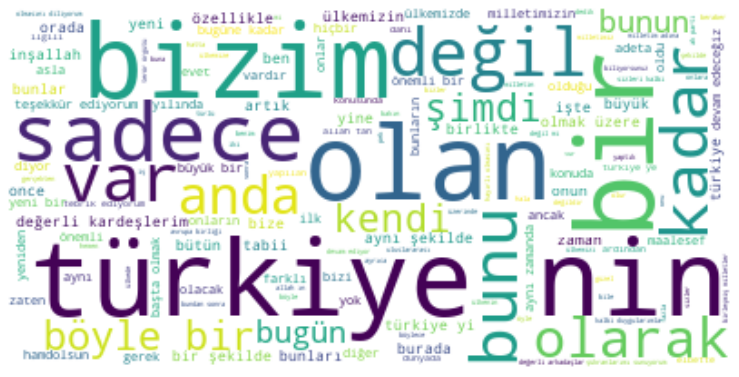

In [9]:
#getting a whole text all speeches of Erdogan
erdogan_words = []

for i in df_e.parag2:
    erdogan_words.append(i)
erdogan_words = ' '.join(erdogan_words)

#visualization the text
wordcloud = WordCloud(background_color="white", max_words=len(erdogan_words))

wordcloud.generate(erdogan_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#in order to get data for Kemal Kılıcdaroglu
k_liste = []
driver.get('https://www.chp.org.tr/arama/5ad84d4587047e133396a14b')
for i in range(1, 191):
    path = "/html/body/div/div/div/div[2]/div[3]/div["+str(i)+"]/a/div/div/a"
    count = i // 20
    #clicking the show more button 
    for j in range(0, count):
        click_cont = WebDriverWait(driver, 30).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'title'))
        )
        time.sleep(5)
        click_cont.click()
        
        
    element = WebDriverWait(driver, 30).until(
    EC.presence_of_element_located((By.XPATH, path))
    )
    element.click()
    text = WebDriverWait(driver, 30).until(
    EC.presence_of_element_located((By.CLASS_NAME, 'article-content'))
    )
    c = text.text
    driver.back()
    time.sleep(5)
    k_liste.append(c)
    print(i,count)

In [ ]:
for i in k_liste:
    if k_liste.count(i) > 1:
        print(k_liste.index(i))

In [ ]:
k_liste= list(set(k_liste))

In [ ]:
for i in t_liste:
    if t_liste.count(i) > 1:
        print(t_liste.index(i))

In [ ]:
df_k = pd.DataFrame(k_liste, columns=['parag'])

In [ ]:
df_k['parag'] = df_k.parag.apply(lambda x: x.lower())
df_k['parag2']= df_k['parag'].apply(cleaning)

In [10]:
X_vector=df_k["parag2"]
vectorizer = CountVectorizer()
vectorizer.fit(X_vector)
X_vector_count = vectorizer.transform(X_vector)
a=pd.DataFrame(X_vector_count.toarray(), columns=vectorizer.get_feature_names())
a.sum().sort_values(ascending=False).head(10)

bir        20668
var         6738
türkiye     5269
ben         3845
diyor       3677
bütün       3503
yok         3239
değerli     3071
değil       2935
bunu        2873
dtype: int64

In [11]:
tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(X_train)
X_train_tf_idf_word = tf_idf_word_vectorizer.transform(X_train)
b=pd.DataFrame(X_train_tf_idf_word.toarray(), columns=tf_idf_word_vectorizer.get_feature_names())
b.sum().sort_values(ascending=False).head(10)

bir        67.273756
var        22.066372
türkiye    18.244350
ben        12.856002
diyor      12.221986
bütün      11.696304
yok        10.577223
değerli    10.470276
değil       9.518371
bunu        9.494773
dtype: float64

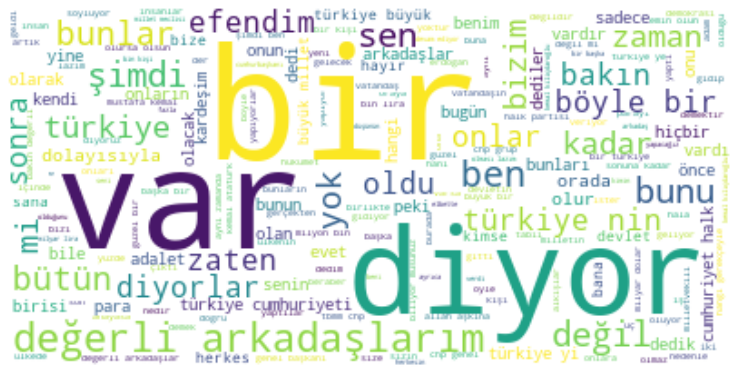

In [12]:
kılıcdaroglu_words = []

for i in df_k.parag2:
    kılıcdaroglu_words.append(i)
kılıcdaroglu_words = ' '.join(kılıcdaroglu_words)

#visualization the text
wordcloud = WordCloud(background_color="white", max_words=len(kılıcdaroglu_words))

wordcloud.generate(kılıcdaroglu_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#in order to get data for Devlet Bahceli
b_liste=[]
driver.get('http://www.mhp.org.tr/htmldocs/genel_baskan/konusmalari/mhp/Devlet_Bahceli_Konusmalari.html')
for i in range(2014,2022):
    link_text = str(i) + " Yılı Konuşmaları"
    time.sleep(5)
    element = WebDriverWait(driver, 30).until(
    EC.presence_of_element_located((By.PARTIAL_LINK_TEXT, link_text))
    )
    element.click()
    time.sleep(5)
    elements = driver.find_elements_by_xpath('/html/body/div[2]/table/tbody/tr/td[2]/table/tbody/tr/td[2]/a')
    
    for j in range(1,len(elements)+1):
        path = '/html/body/div[2]/table/tbody/tr/td[2]/table/tbody/tr['+str(j)+']/td[2]/a'
        click = WebDriverWait(driver, 30).until(
        EC.presence_of_element_located((By.XPATH, path))
        )
        click.click()
        text = WebDriverWait(driver, 30).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'ana_icerik'))
        )
        c = text.text
        b_liste.append(c)
        print(i, j)
        driver.back()
        time.sleep(5)

In [ ]:
for i in b_liste:
    if b_liste.count(i) > 1:
        print(b_liste.index(i))

In [ ]:
b_liste= list(set(b_liste))

In [ ]:
for i in b_liste:
    if b_liste.count(i) > 1:
        print(b_liste.index(i))

In [ ]:
df_b = pd.DataFrame(b_liste, columns=['parag'])

In [ ]:
df_b['parag'] = df_b.parag.apply(lambda x: x.lower())
df_b['parag2']= df_b['parag'].apply(cleaning)

In [13]:
X_vector=df_b["parag2"]
vectorizer = CountVectorizer()
vectorizer.fit(X_vector)
X_vector_count = vectorizer.transform(X_vector)
a=pd.DataFrame(X_vector_count.toarray(), columns=vectorizer.get_feature_names())
a.sum().sort_values(ascending=False).head(10)

bir           21080
türkiye        9405
nin            7310
türk           6904
milli          4995
kadar          3718
hareket        3522
milliyetçi     3220
erdoğan        3217
ın             2924
dtype: int64

In [14]:
tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(X_train)
X_train_tf_idf_word = tf_idf_word_vectorizer.transform(X_train)
b=pd.DataFrame(X_train_tf_idf_word.toarray(), columns=tf_idf_word_vectorizer.get_feature_names())
b.sum().sort_values(ascending=False).head(10)

bir           97.979427
türkiye       46.929639
nin           35.778113
türk          35.158979
milli         26.961007
erdoğan       22.918140
akp           22.001572
hareket       19.076932
kadar         18.333285
milliyetçi    17.311410
dtype: float64

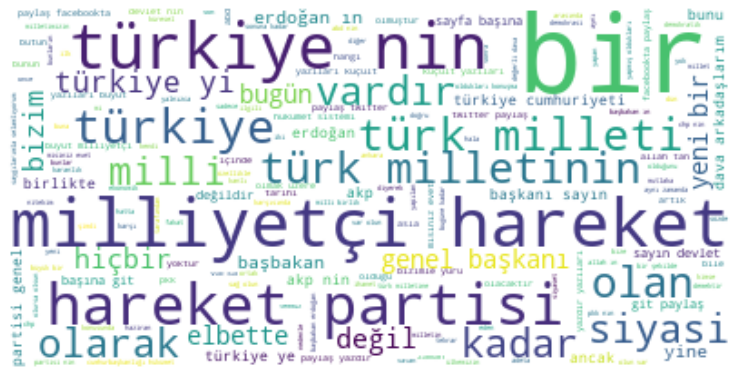

In [15]:
bahceli_words = []

for i in df_b.parag2:
    bahceli_words.append(i)
bahceli_words = ' '.join(bahceli_words)

wordcloud = WordCloud(background_color="white", max_words=len(bahceli_words))

wordcloud.generate(bahceli_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
#some keys words may mislead our model, that's why we will eliminatig them
def parti_chp(x):
    t_liste = []
    a = x.split()
    for i in a: 
        if (i.lower().startswith('kiliçdaroğlu')) or (i.lower().startswith('kemal')) or (i.lower().startswith('chp')) or (i=='bir'):
            continue
        else:
            t_liste.append(i)
    return " ".join(t_liste)
df_k['parag_wth_names']= df_k.parag2.apply(parti_chp)

In [17]:
def parti_mhp(x):
    t_liste = []
    a = x.split()
    for i in a: 
        if (i.lower().startswith('devlet')) or (i.lower().startswith('bahçeli')) or (i.lower().startswith('mhp')) or (i=='bir'):
            continue
        else:
            t_liste.append(i)
    return " ".join(t_liste)
df_b['parag_wth_names']= df_b.parag2.apply(parti_mhp)

In [18]:
def parti_akp(x):
    t_liste = []
    a = x.split()
    for i in a: 
        if (i.lower().startswith('tayyip')) or (i.lower().startswith('recep')) or (i.lower().startswith('erdoğan')) or (i.lower().startswith('akp')) or (i=='bir'):
            continue
        else:
            t_liste.append(i)
    return " ".join(t_liste)
df_e['parag_wth_names']= df_e.parag2.apply(parti_akp)

In [19]:
#labelling each speechs of leaders
df_e['label'] = ('Erdogan '*len(df_e)).split()
df_k['label'] = ('Kilicdaroglu '*len(df_k)).split()
df_b['label'] = ('Bahceli '*len(df_b)).split()

In [20]:
frames = [df_b, df_k, df_e]

result = pd.concat(frames)

In [21]:
result.sample(20)

,Unnamed: 0,parag,parag2,parag_wth_names,label
781,781,"sevgili kayserililer,\ndeğerli kardeşlerim,\ns...",sevgili kayserililer değerli kardeşlerim sizle...,sevgili kayserililer değerli kardeşlerim sizle...,Erdogan
171,171,"kıymetli dostum volodimir zelenskiy,\nsaygıdeğ...",kıymetli dostum volodimir zelenskiy saygıdeğer...,kıymetli dostum volodimir zelenskiy saygıdeğer...,Erdogan
135,135,chp genel başkani kemal kiliçdaroğlu’nun; 08.1...,chp genel başkani kemal kiliçdaroğlu nun grup ...,genel başkani nun grup genel kurulu toplantisi...,Kilicdaroglu
639,639,"değerli misafirler,\nhanımefendiler, beyefendi...",değerli misafirler hanımefendiler beyefendiler...,değerli misafirler hanımefendiler beyefendiler...,Erdogan
532,532,milliyetçi hareket partisi genel başkanı sayın...,milliyetçi hareket partisi genel başkanı sayın...,milliyetçi hareket partisi genel başkanı sayın...,Bahceli
19,19,"chp genel başkani kemal kiliçdaroğlu, tbmm chp...",chp genel başkani kemal kiliçdaroğlu tbmm chp ...,genel başkani tbmm grup toplantisinda konuştu ...,Kilicdaroglu
30,30,"elazığ, toplu açılış töreni'nde yaptıkları kon...",elazığ toplu açılış yaptıkları konuşma değerli...,elazığ toplu açılış yaptıkları konuşma değerli...,Erdogan
98,98,"sayın devlet başkanı,\nkıymetli dostum,\ndeğer...",sayın devlet başkanı kıymetli dostum değerli b...,sayın devlet başkanı kıymetli dostum değerli b...,Erdogan
444,444,"değerli bayburtlular,\nsevgili kardeşlerim;\...",değerli bayburtlular sevgili kardeşlerim sizle...,değerli bayburtlular sevgili kardeşlerim sizle...,Erdogan
505,505,"çok değerli muhtarlarımız,\ndeğerli kardeşleri...",değerli muhtarlarımız değerli kardeşlerim hanı...,değerli muhtarlarımız değerli kardeşlerim hanı...,Erdogan


<AxesSubplot:>

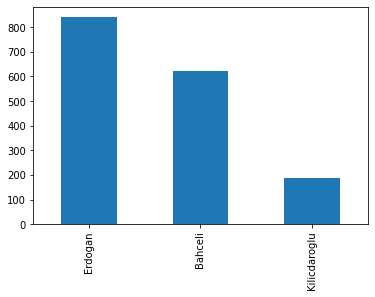

In [116]:
result.label.value_counts().plot(kind='bar')

In [23]:
result['label_num']= result.label.map({'Erdogan':1,'Bahceli':2,'Kılıcdaroglu':3})

In [24]:
#intro senteces may mislead our model, thefore it is better to drop them
def wth_intro(x):
    a = x.split()
    a = a[20:]
    return " ".join(a)

In [25]:
result['wth_intro'] = result.parag_wth_names.apply(wth_intro)

In [26]:
X = result['wth_intro']
y = result['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [27]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [28]:
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [29]:
tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [30]:
X_train_tf_idf_word = tf_idf_word_vectorizer.transform(X_train)
X_test_tf_idf_word = tf_idf_word_vectorizer.transform(X_test)

In [31]:
#firstly we will use logistig regression
model = LogisticRegression()
model.fit(X_train_count, y_train)


#log_count_acc = cross_val_score(model, X_test_count, y_test,cv = 10).mean()
#print(log_count_acc)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred = model.predict(X_test_count)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[139   0   0]
 [  0 158   0]
 [  0   0  34]]
              precision    recall  f1-score   support

     Bahceli       1.00      1.00      1.00       139
     Erdogan       1.00      1.00      1.00       158
Kilicdaroglu       1.00      1.00      1.00        34

    accuracy                           1.00       331
   macro avg       1.00      1.00      1.00       331
weighted avg       1.00      1.00      1.00       331



In [33]:
model = LogisticRegression()
model.fit(X_train_tf_idf_word, y_train)

y_pred = model.predict(X_test_tf_idf_word)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[139   0   0]
 [  0 158   0]
 [  0   2  32]]
              precision    recall  f1-score   support

     Bahceli       1.00      1.00      1.00       139
     Erdogan       0.99      1.00      0.99       158
Kilicdaroglu       1.00      0.94      0.97        34

    accuracy                           0.99       331
   macro avg       1.00      0.98      0.99       331
weighted avg       0.99      0.99      0.99       331



# from here, sentence level prediction

In [6]:
#getting all sentences as list
ba=[]
for i in df_b.parag:
    a = i.split('.')
    #eliminating intro sentences
    for j in a[4:]:
        ba.append(j)
#making label list for sentences
label_b = ('bahceli '*len(ba)).split()
#making dataframe by using zips
df_b_s=pd.DataFrame(zip(ba, label_b),columns=['sentece','label'])

In [7]:
ki=[]
for i in df_k.parag:
    a = i.split('.')
    for j in a[4:]:
        ki.append(j)
label_k = ('kilicdaroglu '*len(ki)).split()
df_k_s=pd.DataFrame(zip(ki, label_k),columns=['sentece','label'])

In [8]:
er=[]
for i in df_e.parag:
    a = i.split('.')
    for j in a[4:]:
        er.append(j)
label_e = ('erdogan '*len(er)).split()
df_e_s=pd.DataFrame(zip(er, label_e),columns=['sentece','label'])

In [9]:
frame = [df_b_s, df_k_s, df_e_s]
df_s = pd.concat(frame)

In [10]:
df_s.sample(10)

,sentece,label
12199,"mahkeme beraat ettiriyor, üst mahkemeye gidiy...",kilicdaroglu
59786,"o meşhur misalle ifade edecek olursak, acil d...",erdogan
67777,"açıkça huzurlu baharları, suyun, havanın ve t...",erdogan
42429,"\nsoyadı gibi iş yapan, tevazu sahibi, erdem s...",bahceli
64951,"din ve vicdan özgürlüğü, artık yok",kilicdaroglu
79593,\ntürk milletinin içinden yeni bir millet çıkmaz,bahceli
41782,"\nmolotofcu olan, molotofçulara, kan döken vam...",bahceli
12489,"\nkudüs, i̇slam dünyasının göz bebeği, haklı d...",bahceli
21840,” devamını okuyorum: “basımevi kurmak izin alm...,kilicdaroglu
28436,siyasetteki başarılarıyla hem bulundukları to...,erdogan


In [13]:
df_s['sentence2']=df_s.sentece.apply(cleaning)

In [14]:
#some words are repeating itself a lot, hence it might be better to drop it
def drop_(x):
    t_liste = []
    a = x.split()
    for i in a:
        if i in ['bir','de','da','nin','bu']:
            continue
        else: 
            t_liste.append(i)
    return " ".join(t_liste)

In [15]:
df_s['sentence2']= df_s['sentence2'].apply(drop_)

In [16]:
#since it is forgotton rearrenging of index, we reset the index, drop the another one
df_s.reset_index(inplace=True)
df_s.drop('index', axis=1, inplace=True)
df_s

,sentece,label,sentence2
0,"\nöğretmenlerimizi bir güne, yani 24 saate sık...",bahceli,öğretmenlerimizi güne yani saate sıkıştırarak ...
1,\n24 kasım günü söylenen yaldızlı sözlerin bir...,bahceli,kasım günü söylenen yaldızlı sözlerin gün sonr...
2,\nöğretmen demek hayat demektir,bahceli,öğretmen demek hayat demektir
3,\nöğretmen şuur ve idrak kilidinin açılmasına ...,bahceli,öğretmen şuur idrak kilidinin açılmasına önaya...
4,\nhepimizin içinden geçtiği bir tedrisat siste...,bahceli,hepimizin içinden geçtiği tedrisat sistemi fey...
...,...,...,...
265359,"\nben bu düşüncelerle sözlerime son verirken, ...",erdogan,ben düşüncelerle sözlerime son verirken forumu...
265360,bu toplantının sizlerin yeni ortaklıklar kurm...,erdogan,toplantının sizlerin yeni ortaklıklar kurmanız...
265361,manas’ın evladı kırgız dostlarımıza ev sahipl...,erdogan,manas ın evladı kırgız dostlarımıza ev sahipli...
265362,kalın sağlıcakla,erdogan,kalın sağlıcakla


In [17]:
#dropping "" values from the dateframe
df_s.drop(list(df_s[df_s.sentence2==""].index), inplace=True)

<AxesSubplot:>

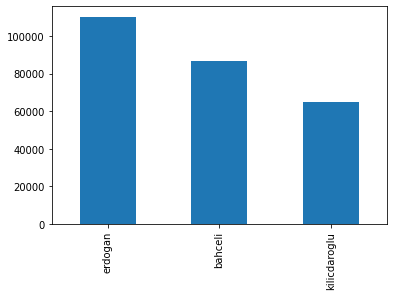

In [18]:
df_s.label.value_counts().plot(kind='bar')

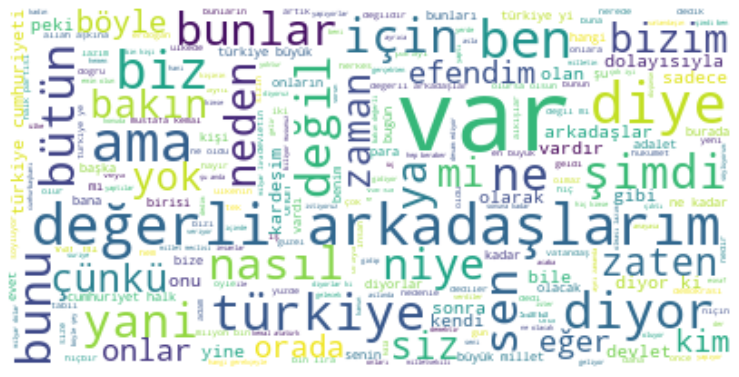

In [50]:
kılıcdaroglu_words = []
sl = df_s[df_s['label']=='kilicdaroglu'].sentence2
for i in sl:
    kılıcdaroglu_words.append(i)
kılıcdaroglu_words = ' '.join(kılıcdaroglu_words)

wordcloud = WordCloud(background_color="white", max_words=len(kılıcdaroglu_words))

wordcloud.generate(kılıcdaroglu_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

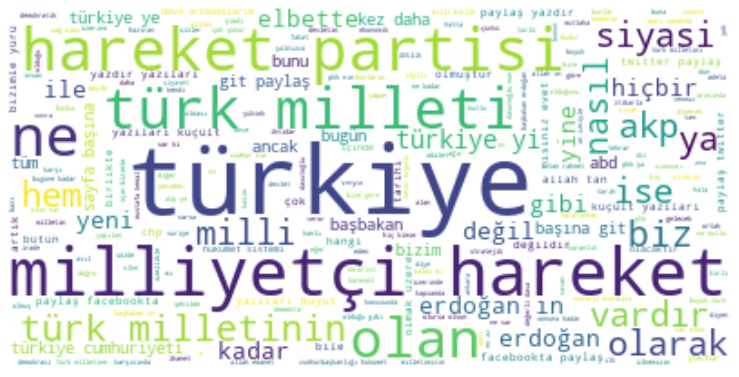

In [51]:
bahceli_words = []
sl = df_s[df_s['label']=='bahceli'].sentence2
for i in sl:
    bahceli_words.append(i)
bahceli_words = ' '.join(bahceli_words)

wordcloud = WordCloud(background_color="white", max_words=len(bahceli_words))

wordcloud.generate(bahceli_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

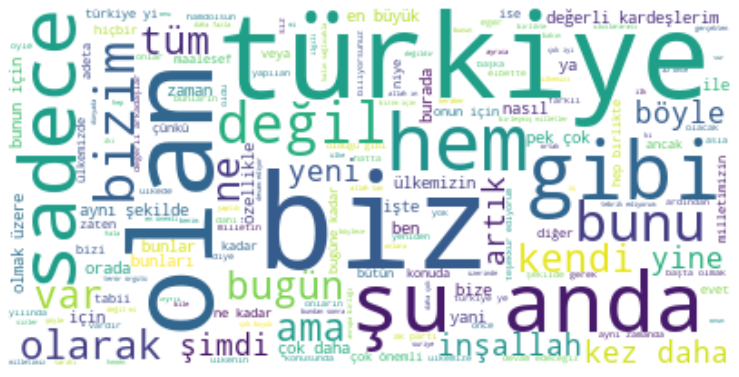

In [52]:
erdogan_words = []
sl = df_s[df_s['label']=='erdogan'].sentence2
for i in sl:
    erdogan_words.append(i)
erdogan_words = ' '.join(erdogan_words)

wordcloud = WordCloud(background_color="white", max_words=len(erdogan_words))

wordcloud.generate(erdogan_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [43]:
X = df_s['sentence2']
y = df_s['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [44]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [45]:
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [46]:
tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [47]:
X_train_tf_idf_word = tf_idf_word_vectorizer.transform(X_train)
X_test_tf_idf_word = tf_idf_word_vectorizer.transform(X_test)

In [48]:
model = LogisticRegression()
model.fit(X_train_count, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
y_pred = model.predict(X_test_count)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[14860  1677   762]
 [ 1520 19221  1412]
 [  684  1348 10897]]
              precision    recall  f1-score   support

     bahceli       0.87      0.86      0.86     17299
     erdogan       0.86      0.87      0.87     22153
kilicdaroglu       0.83      0.84      0.84     12929

    accuracy                           0.86     52381
   macro avg       0.86      0.86      0.86     52381
weighted avg       0.86      0.86      0.86     52381



In [130]:
model = LogisticRegression()
model.fit(X_train_tf_idf_word, y_train)

y_pred = model.predict(X_test_tf_idf_word)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[14818  1854   627]
 [ 1474 19447  1232]
 [  851  1585 10493]]
              precision    recall  f1-score   support

     bahceli       0.86      0.86      0.86     17299
     erdogan       0.85      0.88      0.86     22153
kilicdaroglu       0.85      0.81      0.83     12929

    accuracy                           0.85     52381
   macro avg       0.85      0.85      0.85     52381
weighted avg       0.85      0.85      0.85     52381



In [134]:
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [136]:
y_pred = model.predict(X_test_count)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[14430  2074   795]
 [ 1265 19065  1823]
 [  490  1623 10816]]
              precision    recall  f1-score   support

     bahceli       0.89      0.83      0.86     17299
     erdogan       0.84      0.86      0.85     22153
kilicdaroglu       0.81      0.84      0.82     12929

    accuracy                           0.85     52381
   macro avg       0.84      0.84      0.84     52381
weighted avg       0.85      0.85      0.85     52381



In [39]:
from xgboost import XGBClassifier

In [138]:
model = XGBClassifier()
model.fit(X_train_count, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [139]:
y_pred = model.predict(X_test_count)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 5453 11496   350]
 [  619 20566   968]
 [  404  8435  4090]]
              precision    recall  f1-score   support

     bahceli       0.84      0.32      0.46     17299
     erdogan       0.51      0.93      0.66     22153
kilicdaroglu       0.76      0.32      0.45     12929

    accuracy                           0.57     52381
   macro avg       0.70      0.52      0.52     52381
weighted avg       0.68      0.57      0.54     52381



In [54]:
from sklearn.decomposition import PCA

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
from sklearn.decomposition import TruncatedSVD

In [57]:
pca = TruncatedSVD(n_components = 100)
X_train_count_pca = pca.fit_transform(X_train_count)

In [58]:
X_test_count_pca = pca.transform(X_test_count)

In [145]:
model = LogisticRegression()
model.fit(X_train_count_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [146]:
y_pred = model.predict(X_test_count_pca)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[12241  4085   973]
 [ 4948 15103  2102]
 [ 3621  3758  5550]]
              precision    recall  f1-score   support

     bahceli       0.59      0.71      0.64     17299
     erdogan       0.66      0.68      0.67     22153
kilicdaroglu       0.64      0.43      0.51     12929

    accuracy                           0.63     52381
   macro avg       0.63      0.61      0.61     52381
weighted avg       0.63      0.63      0.62     52381



In [147]:
pca = TruncatedSVD(n_components = 100)
X_train_tf_idf_word_pca = pca.fit_transform(X_train_tf_idf_word)

In [148]:
X_test_tf_idf_word_pca = pca.transform(X_test_tf_idf_word)

In [149]:
model = LogisticRegression()
model.fit(X_train_tf_idf_word_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [150]:
y_pred = model.predict(X_test_count_pca)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[7601 5999 3699]
 [7003 8572 6578]
 [5073 5355 2501]]
              precision    recall  f1-score   support

     bahceli       0.39      0.44      0.41     17299
     erdogan       0.43      0.39      0.41     22153
kilicdaroglu       0.20      0.19      0.19     12929

    accuracy                           0.36     52381
   macro avg       0.34      0.34      0.34     52381
weighted avg       0.36      0.36      0.36     52381



In [151]:
model = RandomForestClassifier()
model.fit(X_train_count_pca, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [152]:
y_pred = model.predict(X_test_count_pca)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[12010  4225  1064]
 [ 2659 17261  2233]
 [ 1675  3817  7437]]
              precision    recall  f1-score   support

     bahceli       0.73      0.69      0.71     17299
     erdogan       0.68      0.78      0.73     22153
kilicdaroglu       0.69      0.58      0.63     12929

    accuracy                           0.70     52381
   macro avg       0.70      0.68      0.69     52381
weighted avg       0.70      0.70      0.70     52381



In [153]:
y_pred = model.predict(X_train_count_pca)

print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train, y_pred))

[[69393    39    16]
 [  106 87914    75]
 [   46    29 51905]]
              precision    recall  f1-score   support

     bahceli       1.00      1.00      1.00     69448
     erdogan       1.00      1.00      1.00     88095
kilicdaroglu       1.00      1.00      1.00     51980

    accuracy                           1.00    209523
   macro avg       1.00      1.00      1.00    209523
weighted avg       1.00      1.00      1.00    209523



In [154]:
model = RandomForestClassifier(min_samples_split=25)
model.fit(X_train_count_pca, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [155]:
y_pred = model.predict(X_test_count_pca)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[11698  4524  1077]
 [ 2485 17439  2229]
 [ 1663  4058  7208]]
              precision    recall  f1-score   support

     bahceli       0.74      0.68      0.71     17299
     erdogan       0.67      0.79      0.72     22153
kilicdaroglu       0.69      0.56      0.61     12929

    accuracy                           0.69     52381
   macro avg       0.70      0.67      0.68     52381
weighted avg       0.70      0.69      0.69     52381



In [59]:
model = XGBClassifier()
model.fit(X_train_count_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [60]:
y_pred = model.predict(X_test_count_pca)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[10890  5101  1308]
 [ 3326 16292  2535]
 [ 2353  4287  6289]]
              precision    recall  f1-score   support

     bahceli       0.66      0.63      0.64     17299
     erdogan       0.63      0.74      0.68     22153
kilicdaroglu       0.62      0.49      0.55     12929

    accuracy                           0.64     52381
   macro avg       0.64      0.62      0.62     52381
weighted avg       0.64      0.64      0.64     52381



In [61]:
model = LogisticRegression()
model.fit(X_train_count, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
y_pred = model.predict(X_test_count)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[14860  1677   762]
 [ 1520 19221  1412]
 [  684  1348 10897]]
              precision    recall  f1-score   support

     bahceli       0.87      0.86      0.86     17299
     erdogan       0.86      0.87      0.87     22153
kilicdaroglu       0.83      0.84      0.84     12929

    accuracy                           0.86     52381
   macro avg       0.86      0.86      0.86     52381
weighted avg       0.86      0.86      0.86     52381



In [63]:
#the prediction for whole speech is really impressive, but it is reduced for sentences. 
#For the whole speech,the logictic regression worked very well, it predicted without any failure
#For the sentence level, several models  are applied, but overfitting and performance were major problemsç
#So that, the logistic regression predicted also better than other models. 

# from here, similarty analysis

 similarty analysis for sentences

In [126]:
X_v = vectorizer.transform(X)

In [129]:
df_pr = df_s[['sentence2','label']]

In [133]:
#getting probiblity of each label for each sentence
df_pr['bahceli']=  model.predict_proba(X_v)[:,0]
df_pr['erdogan'] = model.predict_proba(X_v)[:,1]
df_pr['kilicdaroglu'] = model.predict_proba(X_v)[:,2]

In [134]:
df_pr

,sentence2,label,bahceli,erdogan,kilicdaroglu
0,öğretmenlerimizi güne yani saate sıkıştırarak ...,bahceli,0.929494,0.011082,0.059423
1,kasım günü söylenen yaldızlı sözlerin gün sonr...,bahceli,0.999268,0.000730,0.000001
2,öğretmen demek hayat demektir,bahceli,0.557408,0.127253,0.315339
3,öğretmen şuur idrak kilidinin açılmasına önaya...,bahceli,0.855970,0.143649,0.000381
4,hepimizin içinden geçtiği tedrisat sistemi fey...,bahceli,0.248251,0.038847,0.712903
...,...,...,...,...,...
265358,kanser hücrelerini bünyenizden ne kadar kısa s...,erdogan,0.120499,0.797983,0.081518
265359,ben düşüncelerle sözlerime son verirken forumu...,erdogan,0.003785,0.992317,0.003898
265360,toplantının sizlerin yeni ortaklıklar kurmanız...,erdogan,0.001567,0.998413,0.000020
265361,manas ın evladı kırgız dostlarımıza ev sahipli...,erdogan,0.064007,0.921342,0.014651


In [135]:
from scipy.spatial import distance

In [144]:
#covariance between labes' probiblities 
df_pr.cov()

,bahceli,erdogan,kilicdaroglu
bahceli,0.163908,-0.103423,-0.060485
erdogan,-0.103423,0.174375,-0.070952
kilicdaroglu,-0.060485,-0.070952,0.131437


In [136]:
#correlations between labes' probiblities 
df_pr.corr()

,bahceli,erdogan,kilicdaroglu
bahceli,1.000000,-0.611749,-0.412088
erdogan,-0.611749,1.000000,-0.468667
kilicdaroglu,-0.412088,-0.468667,1.000000


In [143]:
print('differences between erdogan, kilicdaroglu, ',distance.euclidean(np.array(df_pr['erdogan']), np.array(df_pr['kilicdaroglu'])))
print('differences between erdogan, bahceli, ',distance.euclidean(np.array(df_pr['erdogan']), np.array(df_pr['bahceli'])))
print('differences between kilicdaroglu, bahceli, ',distance.euclidean(np.array(df_pr['kilicdaroglu']), np.array(df_pr['bahceli'])))

differences between erdogan, kilicdaroglu,  354.0770683969024
differences between erdogan, bahceli,  380.9204389658802
differences between kilicdaroglu, bahceli,  332.8386741374116


In [151]:
df_e['label'] = ('erdogan '*len(df_e)).split()
df_k['label'] = ('kilicdaroglu '*len(df_k)).split()
df_b['label'] = ('bahceli '*len(df_b)).split()


In [154]:
frame = [df_e, df_k, df_b]
df_parag = pd.concat(frame)

In [170]:
df_parag.reset_index(inplace=True)
df_parag.drop('index', axis=1, inplace=True)

In [171]:
X = df_parag['parag2']
y = df_parag['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [172]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [173]:
model = LogisticRegression()
model.fit(X_train_count, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [174]:
y_pred = model.predict(X_test_count)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[116   0   0]
 [  0 179   0]
 [  1   1  34]]
              precision    recall  f1-score   support

     bahceli       0.99      1.00      1.00       116
     erdogan       0.99      1.00      1.00       179
kilicdaroglu       1.00      0.94      0.97        36

    accuracy                           0.99       331
   macro avg       1.00      0.98      0.99       331
weighted avg       0.99      0.99      0.99       331



In [175]:
X_v = vectorizer.transform(X)

In [176]:
df_parag['bahceli']=  model.predict_proba(X_v)[:,0]
df_parag['erdogan'] = model.predict_proba(X_v)[:,1]
df_parag['kilicdaroglu'] = model.predict_proba(X_v)[:,2]

In [177]:
df_parag

,parag,parag2,label,bahceli,erdogan,kilicdaroglu
0,bosna hersek devlet başkanlığı konseyinin sayı...,bosna hersek devlet başkanlığı konseyinin sayı...,erdogan,1.804679e-08,9.999985e-01,1.500627e-06
1,yükseköğretim kurumumuzun ve üniversitelerimiz...,yükseköğretim kurumumuzun üniversitelerimizin ...,erdogan,3.526635e-10,9.999988e-01,1.220327e-06
2,"sevgili vatandaşlarım,\nçok değerli kardeşleri...",sevgili vatandaşlarım değerli kardeşlerim sayg...,erdogan,5.549963e-06,9.999867e-01,7.778295e-06
3,"sayın başbakan, değerli dostum,\nkıymetli misa...",sayın başbakan değerli dostum kıymetli misafir...,erdogan,2.324213e-07,9.999987e-01,1.035383e-06
4,"hanımefendiler,\nbeyefendiler,\nsizleri sevgiy...",hanımefendiler beyefendiler sizleri sevgiyle s...,erdogan,1.031956e-03,9.986466e-01,3.214141e-04
...,...,...,...,...,...,...
1649,milliyetçi hareket partisi genel başkanı sayın...,milliyetçi hareket partisi genel başkanı sayın...,bahceli,9.999993e-01,5.391594e-07,1.646479e-07
1650,milliyetçi hareket partisi genel başkanı sayın...,milliyetçi hareket partisi genel başkanı sayın...,bahceli,9.997968e-01,1.985608e-04,4.601105e-06
1651,milliyetçi hareket partisi genel başkanı sayın...,milliyetçi hareket partisi genel başkanı sayın...,bahceli,1.000000e+00,1.247044e-10,5.349364e-09
1652,milliyetçi hareket partisi genel başkanı sayın...,milliyetçi hareket partisi genel başkanı sayın...,bahceli,9.999609e-01,3.775208e-05,1.380812e-06


In [178]:
df_parag.cov()

,bahceli,erdogan,kilicdaroglu
bahceli,0.234739,-0.192042,-0.042696
erdogan,-0.192042,0.249559,-0.057517
kilicdaroglu,-0.042696,-0.057517,0.100213


In [179]:
df_parag.corr()

,bahceli,erdogan,kilicdaroglu
bahceli,1.000000,-0.793447,-0.278379
erdogan,-0.793447,1.000000,-0.363701
kilicdaroglu,-0.278379,-0.363701,1.000000


In [180]:
print('differences between erdogan, kilicdaroglu, ',distance.euclidean(np.array(df_parag['erdogan']), np.array(df_parag['kilicdaroglu'])))
print('differences between erdogan, bahceli, ',distance.euclidean(np.array(df_parag['erdogan']), np.array(df_parag['bahceli'])))
print('differences between kilicdaroglu, bahceli, ',distance.euclidean(np.array(df_parag['kilicdaroglu']), np.array(df_parag['bahceli'])))

differences between erdogan, kilicdaroglu,  32.05755106022194
differences between erdogan, bahceli,  38.261273557584595
differences between kilicdaroglu, bahceli,  28.473856124965234


In [186]:
df_vector = pd.DataFrame(X_v.toarray())
df_vector['label'] = df_parag['label']
df_vector

,0,1,2,3,4,5,6,7,8,9,...,155984,155985,155986,155987,155988,155989,155990,155991,155992,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,erdogan
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,erdogan
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,erdogan
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,erdogan
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,erdogan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,0,0,21,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,bahceli
1650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,bahceli
1651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,bahceli
1652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,bahceli


In [187]:
df_vector.pivot_table(index='label')

,0,1,2,3,4,5,6,7,8,9,...,155983,155984,155985,155986,155987,155988,155989,155990,155991,155992
label,,,,,,,,,,,,,,,,,,,,,
bahceli,0.000000,0.000000,0.431090,0.032051,0.000000,0.003205,0.003205,0.000000,0.003205,0.000000,...,0.003205,0.001603,0.001603,0.118590,0.003205,0.000000,0.000000,0.004808,0.001603,0.001603
erdogan,0.001189,0.001189,0.015458,0.002378,0.005945,0.007134,0.000000,0.001189,0.000000,0.001189,...,0.000000,0.000000,0.000000,0.093936,0.010702,0.002378,0.000000,0.000000,0.000000,0.000000
kilicdaroglu,0.000000,0.000000,0.010582,0.000000,0.000000,0.005291,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.121693,0.000000,0.000000,0.005291,0.010582,0.000000,0.000000


In [188]:
df_vector.melt()

,0,1,2,3,4,5,6,7,8,9,...,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,21,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
